##Projekt praktyczny - regresja##

In [90]:
import pandas as pd

In [91]:
import numpy as np

In [92]:
import seaborn as sns

In [93]:
laptop=pd.read_csv('laptop_price.csv', encoding='latin-1') #użytko encoding w celu poprawnego załadowania pliku

#Zapoznanie ze zbiorem#

In [94]:
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [95]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [96]:
import scipy.stats as sps

<ipython-input-97-fdcdf40aaafc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop['Price_euros']) #sprawdzanie rozkładu zmiennej zależnej


<Axes: xlabel='Price_euros', ylabel='Density'>

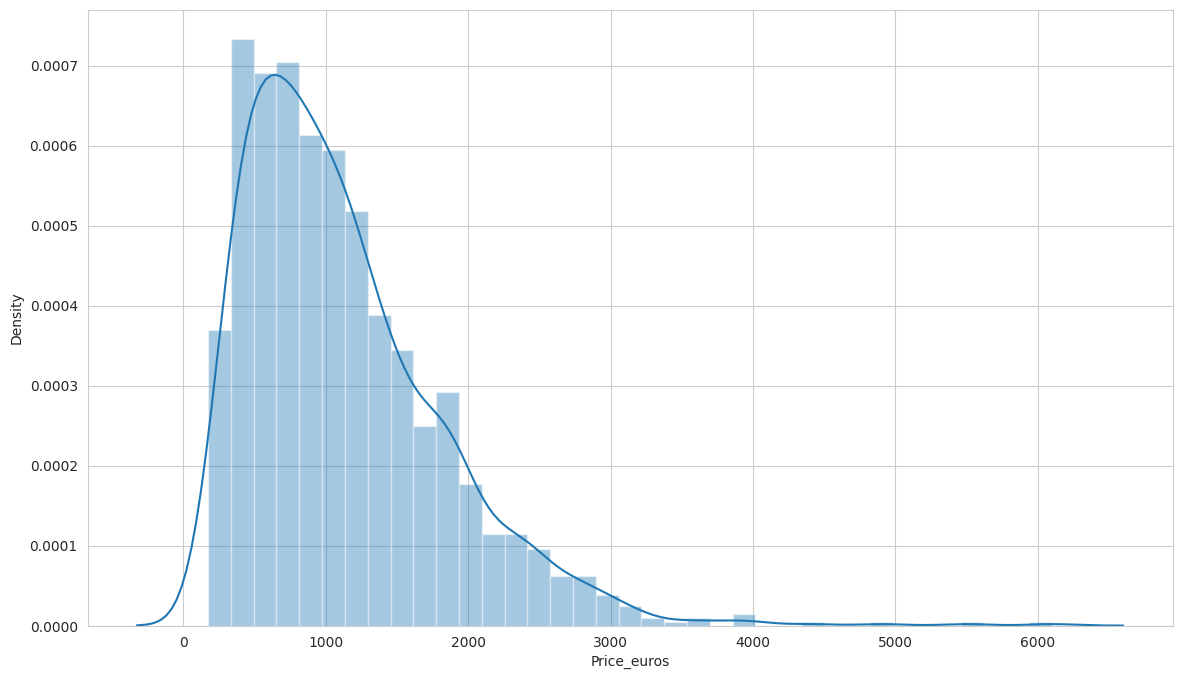

In [97]:
sns.distplot(laptop['Price_euros']) #sprawdzanie rozkładu zmiennej zależnej

#Przetwarzanie#

In [227]:
#obliczenie podstawowych wartości statystyki matematycznej
#średnia
price_avg = laptop1['Price_euros'].mean()
price_avg

1095.4125096824168

In [228]:
#odchylenie standardowe
price_std = laptop1['Price_euros'].std()
price_std

631.9674494908912

In [229]:
#mediana
price_median = laptop1['Price_euros'].median()
price_median

961.0

In [98]:
#usuwanie wartości odstających ze zmiennej zależnej

upper=laptop['Price_euros'].mean()+laptop['Price_euros'].std()*3
lower=laptop['Price_euros'].mean()-laptop['Price_euros'].std()*3

In [99]:
laptop1=laptop[(laptop['Price_euros']<upper) & (laptop['Price_euros']>lower)]

<ipython-input-100-3abe22c8bf42>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop1['Price_euros'])


<Axes: xlabel='Price_euros', ylabel='Density'>

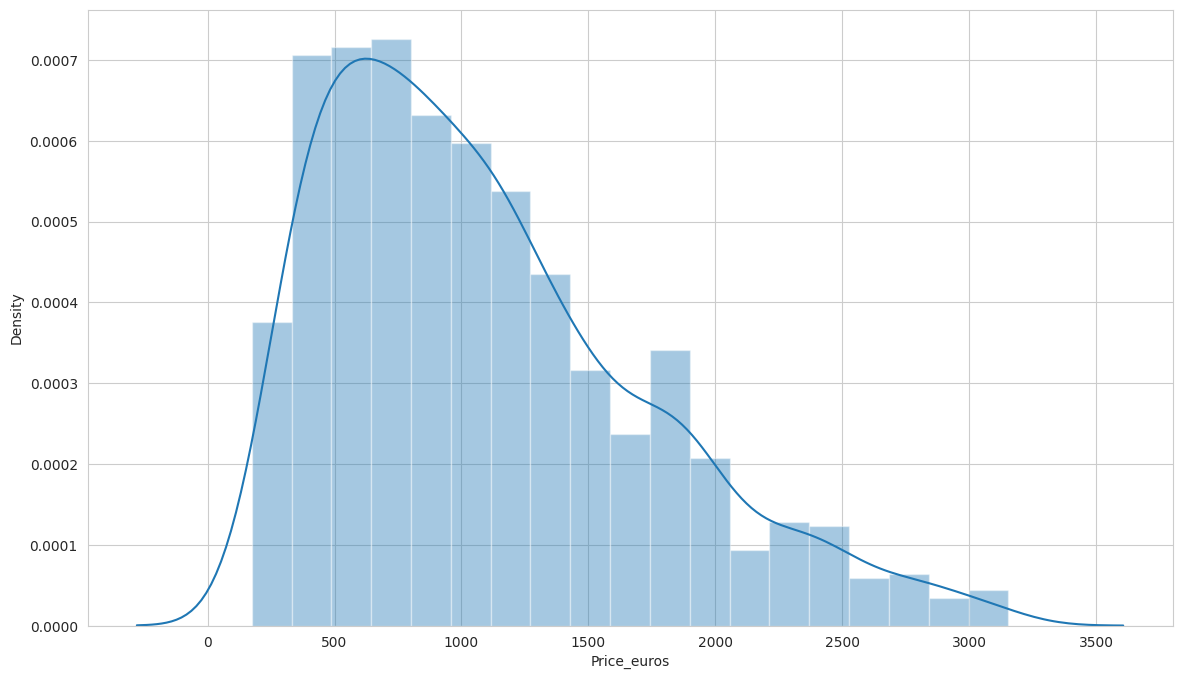

In [100]:
sns.distplot(laptop1['Price_euros'])

In [230]:
sps.shapiro(laptop1['Price_euros'])  #test Shapiro - rozkład jest normalny, Pvalue większe od 0.05

ShapiroResult(statistic=0.9317129850387573, pvalue=7.904652905300503e-24)

Text(0.5, 1.0, 'Ilość laptopów poszczególnych producentów')

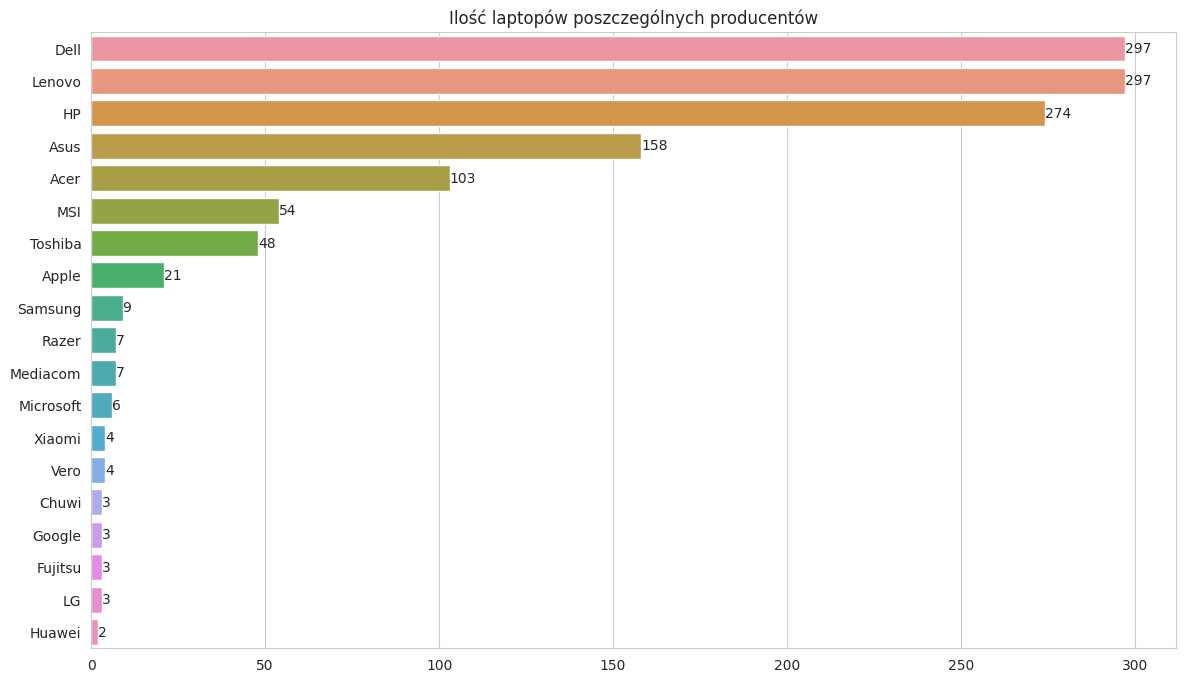

In [134]:
counted_company = pd.DataFrame(laptop['Company'].value_counts()).reset_index()
counted_company.columns = ['Company', 'Amount']
counted_company
counted_figure = sns.barplot(y='Company', x ='Amount', data=counted_company)
counted_figure.bar_label(counted_figure.containers[0])
counted_figure.set_xlabel('')
counted_figure.set_ylabel('')
counted_figure.set_title('Ilość laptopów poszczególnych producentów')

In [130]:
#pogrupowanie laptopów ze względu na markę i średnia cenę

laptop_avg_price = pd.DataFrame(laptop1.groupby(['Company'])['Price_euros'].mean()).reset_index().sort_values(by='Price_euros', ascending=False)
laptop_avg_price

,Company,Price_euros
9,LG,2099.000000
14,Razer,2081.500000
11,MSI,1728.908148
6,Google,1677.666667
13,Microsoft,1612.308333
1,Apple,1564.198571
8,Huawei,1424.000000
15,Samsung,1413.444444
16,Toshiba,1267.812500
4,Dell,1169.539966


[Text(0, 0, '2099'),
 Text(0, 0, '2081.5'),
 Text(0, 0, '1728.91'),
 Text(0, 0, '1677.67'),
 Text(0, 0, '1612.31'),
 Text(0, 0, '1564.2'),
 Text(0, 0, '1424'),
 Text(0, 0, '1413.44'),
 Text(0, 0, '1267.81'),
 Text(0, 0, '1169.54'),
 Text(0, 0, '1133.46'),
 Text(0, 0, '1067.91'),
 Text(0, 0, '1058.57'),
 Text(0, 0, '1044.97'),
 Text(0, 0, '729'),
 Text(0, 0, '626.776'),
 Text(0, 0, '314.297'),
 Text(0, 0, '295'),
 Text(0, 0, '217.425')]

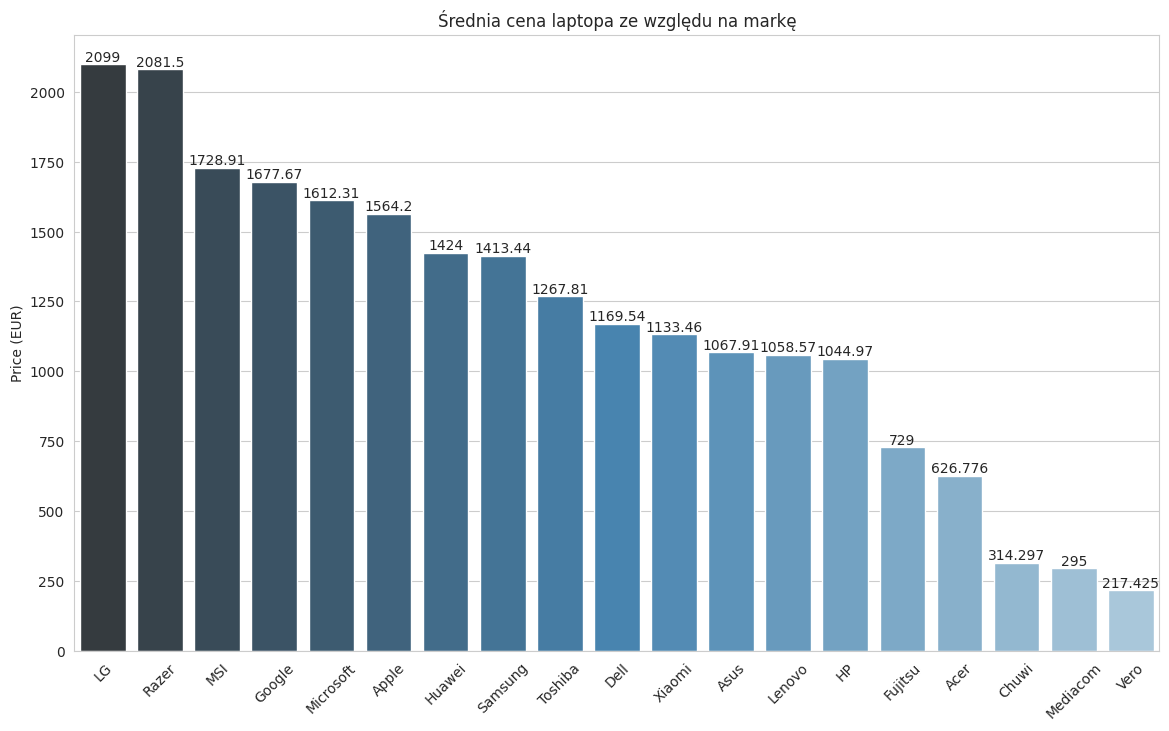

In [132]:


sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
pal1 = sns.color_palette("Blues_d", len(laptop_avg_price))
s = sns.barplot(data=laptop_avg_price, x="Company", y="Price_euros", palette=np.array(pal1[::-1]))
s.set_title("Średnia cena laptopa ze względu na markę");
plt.xticks(rotation=45)
s.set_ylabel('Price (EUR)')
s.set_xlabel('')
s.bar_label(s.containers[0])

[Text(0, 0, '1749.63'),
 Text(0, 0, '1571.18'),
 Text(0, 0, '1286.48'),
 Text(0, 0, '1262.87'),
 Text(0, 0, '1139.92'),
 Text(0, 0, '617.069'),
 Text(0, 0, '587.973'),
 Text(0, 0, '553.585'),
 Text(0, 0, '434')]

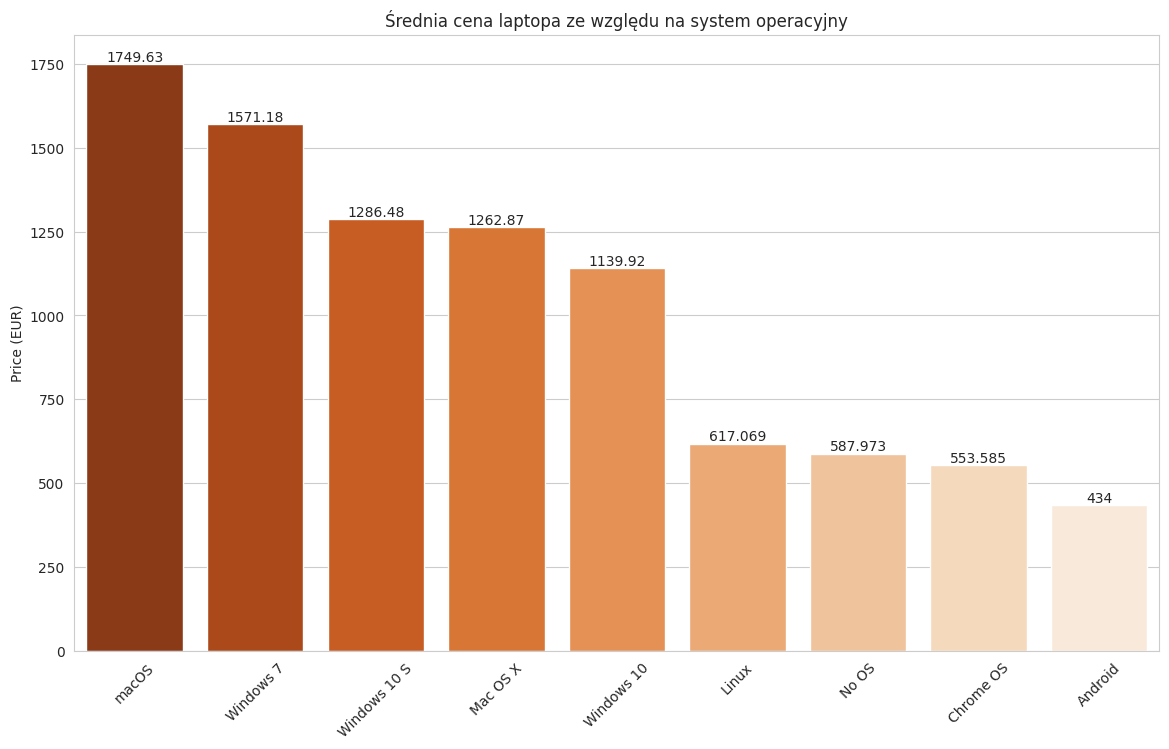

In [133]:
avg_system_price = pd.DataFrame(laptop1.groupby('OpSys')['Price_euros'].mean()).reset_index().sort_values(by='Price_euros', ascending=False)
avg_system_price
pal1 = sns.color_palette("Oranges", len(avg_system_price))
s = sns.barplot(data=avg_system_price, x="OpSys", y="Price_euros", palette=np.array(pal1[::-1]))
s.set_title("Średnia cena laptopa ze względu na system operacyjny");
plt.xticks(rotation=45)
s.set_ylabel('Price (EUR)')
s.set_xlabel('')
s.bar_label(s.containers[0])

Usuwamy wszystkie znaki poza wielkością rozdzielczości w kolumnie 'ScreenResolution'

In [102]:
laptop['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [103]:
laptop1['ScreenResolution'] = laptop1['ScreenResolution'].apply(lambda x: x[-9:].strip())

<ipython-input-103-3f53c8ac8acc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['ScreenResolution'] = laptop1['ScreenResolution'].apply(lambda x: x[-9:].strip())


In [104]:
laptop1['ScreenResolution'].unique()

array(['2560x1600', '1440x900', '1920x1080', '2880x1800', '1366x768',
       '2304x1440', '3200x1800', '1920x1200', '2256x1504', '3840x2160',
       '2160x1440', '2560x1440', '1600x900', '2736x1824', '2400x1600'],
      dtype=object)

Usuwamy wszystkie znaki poza wielkością ram w kolumnie 'Ram'

In [105]:
laptop1['Ram'] = laptop1['Ram'].apply(lambda x: x[:-2].strip())

<ipython-input-105-8f7e45189c72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Ram'] = laptop1['Ram'].apply(lambda x: x[:-2].strip())


In [106]:
laptop1['Ram'].unique()

array(['8', '16', '4', '2', '12', '6', '32', '24'], dtype=object)

In [107]:
laptop1['Ram'] = laptop1['Ram'].astype('int64')  #zmiana z object na int64

<ipython-input-107-b4f85d55c9f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Ram'] = laptop1['Ram'].astype('int64')


In [108]:
laptop1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1291 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1291 non-null   int64  
 1   Company           1291 non-null   object 
 2   Product           1291 non-null   object 
 3   TypeName          1291 non-null   object 
 4   Inches            1291 non-null   float64
 5   ScreenResolution  1291 non-null   object 
 6   Cpu               1291 non-null   object 
 7   Ram               1291 non-null   int64  
 8   Memory            1291 non-null   object 
 9   Gpu               1291 non-null   object 
 10  OpSys             1291 non-null   object 
 11  Weight            1291 non-null   object 
 12  Price_euros       1291 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 141.2+ KB


In [109]:
#Ujednolicamy dane dla kolumny 'Memory'

In [110]:
laptop1['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '512GB Flash Storage', '128GB HDD', '240GB SSD',
       '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '256GB SSD +  1.0TB Hybrid'], dtype=object)

In [111]:
laptop1['Memory']=laptop1['Memory'].str.replace('Flash Storage', 'Flash_Storage')  #złączenie w jedną nazwę rodzaju dysku Flash

<ipython-input-111-a8679a940adb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Memory']=laptop1['Memory'].str.replace('Flash Storage', 'Flash_Storage')


In [112]:
laptop1['Memory']=laptop1['Memory'].str.replace('1TB', '1000GB') #ujednolicenie jednostek dysku

<ipython-input-112-68c0e12ba094>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Memory']=laptop1['Memory'].str.replace('1TB', '1000GB')


In [113]:
laptop1['Memory']=laptop1['Memory'].str.replace('2TB', '2000GB') #ujendolicenie jednostek dysku c.d.

<ipython-input-113-625ccf253d48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Memory']=laptop1['Memory'].str.replace('2TB', '2000GB')


In [114]:
laptop1['Memory'].unique()

array(['128GB SSD', '128GB Flash_Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash_Storage', '1000GB HDD',
       '32GB Flash_Storage', '128GB SSD +  1000GB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash_Storage',
       '256GB SSD +  1000GB HDD', '256GB SSD +  2000GB HDD', '32GB SSD',
       '2000GB HDD', '64GB SSD', '1.0TB Hybrid',
       '512GB SSD +  1000GB HDD', '1000GB SSD', '256GB SSD +  500GB HDD',
       '128GB SSD +  2000GB HDD', '512GB SSD +  512GB SSD', '16GB SSD',
       '16GB Flash_Storage', '512GB SSD +  256GB SSD',
       '512GB SSD +  2000GB HDD', '64GB Flash_Storage +  1000GB HDD',
       '180GB SSD', '1000GB HDD +  1000GB HDD', '32GB HDD',
       '512GB Flash_Storage', '128GB HDD', '240GB SSD', '8GB SSD',
       '508GB Hybrid', '1.0TB HDD', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [115]:
laptop1[['Disc', 'Disc2']] = laptop1['Memory'].str.split('+', expand=True) #rozdzielenie dysku na podstawowy i dodatkowy

<ipython-input-115-a340f7a12582>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1[['Disc', 'Disc2']] = laptop1['Memory'].str.split('+', expand=True)
<ipython-input-115-a340f7a12582>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1[['Disc', 'Disc2']] = laptop1['Memory'].str.split('+', expand=True)


In [116]:
laptop1['Disc'] = laptop1['Disc'].apply(lambda x: x.strip()) #usunięcie spacji przy danych dla dysku

<ipython-input-116-246f3ded1cd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Disc'] = laptop1['Disc'].apply(lambda x: x.strip())


In [117]:
laptop1['Disc2'] = laptop1['Disc2'].fillna('0GB') #zamiana braku danych dla wielkości dysku dodatkowego na '0GB'

<ipython-input-117-08d9437bde34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Disc2'] = laptop1['Disc2'].fillna('0GB')


In [118]:
laptop1['Disc2'] = laptop1['Disc2'].apply(lambda x: x[:].lstrip()) #usunięcie spacji przy danych dla dysku dodatkowego

<ipython-input-118-17ec92f28ef4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Disc2'] = laptop1['Disc2'].apply(lambda x: x[:].lstrip())


In [119]:
laptop1[['Disc_size', 'Disc_type']] = laptop1['Disc'].str.split(' ', expand=True) #podzial dysku podstawowego na wielkość i typ

<ipython-input-119-c3c0d0032a27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1[['Disc_size', 'Disc_type']] = laptop1['Disc'].str.split(' ', expand=True)
<ipython-input-119-c3c0d0032a27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1[['Disc_size', 'Disc_type']] = laptop1['Disc'].str.split(' ', expand=True)


In [120]:
laptop1[['Disc2_size', 'Disc2_type']] = laptop1['Disc2'].str.split(' ', expand=True) #podział dysku dodatkowego na wielkość i typ

<ipython-input-120-181a75bc0229>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1[['Disc2_size', 'Disc2_type']] = laptop1['Disc2'].str.split(' ', expand=True)
<ipython-input-120-181a75bc0229>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1[['Disc2_size', 'Disc2_type']] = laptop1['Disc2'].str.split(' ', expand=True)


In [121]:
laptop1['Disc_size'] = laptop1['Disc_size'].apply(lambda x: x[:-2].strip()) #usunięcie spacji z wielkości dysku podstawowego

<ipython-input-121-98a9a21d15f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Disc_size'] = laptop1['Disc_size'].apply(lambda x: x[:-2].strip())


In [122]:
laptop1['Disc2_size'] = laptop1['Disc2_size'].apply(lambda x: x[:-2].strip()) #usunięcie spacji z wielkości dysku dodatkowego

<ipython-input-122-938e5aabe775>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Disc2_size'] = laptop1['Disc2_size'].apply(lambda x: x[:-2].strip())


In [123]:
laptop1['Disc2_type'] = laptop1['Disc2_type'].fillna('no Disc2') #zamiana braku danych dla rodzaju dysku dodatkowego na 'no Disc2'

<ipython-input-123-a8ad623dc2ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Disc2_type'] = laptop1['Disc2_type'].fillna('no Disc2')


In [124]:
laptop1.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Disc,Disc2,Disc_size,Disc_type,Disc2_size,Disc2_type
0,1,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,128GB SSD,0GB,128,SSD,0,no Disc2
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash_Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,128GB Flash_Storage,0GB,128,Flash_Storage,0,no Disc2
2,3,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,256GB SSD,0GB,256,SSD,0,no Disc2
3,4,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,512GB SSD,0GB,512,SSD,0,no Disc2
4,5,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,256GB SSD,0GB,256,SSD,0,no Disc2


In [125]:
#Zmieniamy Disc size i Disc_2 size na float

laptop1['Disc_size'] = laptop1['Disc_size'].astype('float64')


<ipython-input-125-59249bd6c6fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Disc_size'] = laptop1['Disc_size'].astype('float64')


In [126]:
laptop1['Disc2_size'] = laptop1['Disc2_size'].astype('float64')


<ipython-input-126-f717a70ab064>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Disc2_size'] = laptop1['Disc2_size'].astype('float64')


In [127]:
#Usuniecie kg z wagi oraz zamiana na float
laptop1['Weight'] = laptop1['Weight'].apply(lambda x: x[:-2].strip())
laptop1['Weight'] = laptop1['Weight'].astype('float64')

<ipython-input-127-47ced66d9550>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Weight'] = laptop1['Weight'].apply(lambda x: x[:-2].strip())
<ipython-input-127-47ced66d9550>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Weight'] = laptop1['Weight'].astype('float64')


In [128]:
laptop1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1291 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1291 non-null   int64  
 1   Company           1291 non-null   object 
 2   Product           1291 non-null   object 
 3   TypeName          1291 non-null   object 
 4   Inches            1291 non-null   float64
 5   ScreenResolution  1291 non-null   object 
 6   Cpu               1291 non-null   object 
 7   Ram               1291 non-null   int64  
 8   Memory            1291 non-null   object 
 9   Gpu               1291 non-null   object 
 10  OpSys             1291 non-null   object 
 11  Weight            1291 non-null   float64
 12  Price_euros       1291 non-null   float64
 13  Disc              1291 non-null   object 
 14  Disc2             1291 non-null   object 
 15  Disc_size         1291 non-null   float64
 16  Disc_type         1291 non-null   object 


<Axes: >

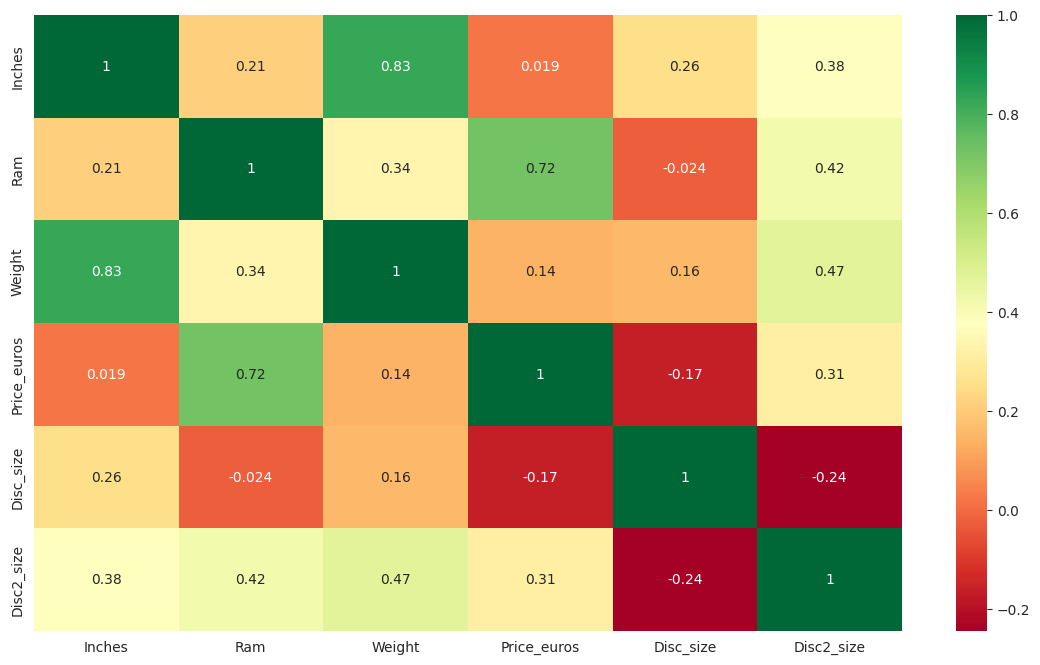

In [129]:
#sprawdzamy korelacje/heat-mapę dla obecnych danych, które są do tego obecnie przystosowane

laptop_corr = laptop1.iloc[:,1:].corr()
sns.heatmap(laptop_corr, cmap='RdYlGn', annot=True)


In [131]:
import matplotlib.pyplot as plt


In [135]:
laptop1.head(1)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Disc,Disc2,Disc_size,Disc_type,Disc2_size,Disc2_type
0,1,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128GB SSD,0GB,128.0,SSD,0.0,no Disc2


Modele predykcyjne

In [136]:
X=laptop1[['Inches', 'Ram', 'Weight', 'Disc_size', 'Disc2_size']]

y=laptop1['Price_euros']

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=777)

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

Regresja liniowa

In [140]:
model_lin=LinearRegression()
model_lin.fit(X_train, y_train)

LinearRegression()

In [141]:
y_lin_train=model_lin.predict(X_train)  #predykcja na zbiorze treningowym

In [142]:
y_lin_test=model_lin.predict(X_test)  #predykcja na zbiorze testowym

In [143]:
from sklearn.metrics import r2_score

In [144]:
r2_score(y_test, y_lin_test)  #r2 score dla zbioru testowego

0.5907121851266192

In [145]:
r2_score(y_train, y_lin_train) #r2 score dla zbioru treningowego

0.5471979263259585

In [146]:
from sklearn.metrics import mean_squared_error

In [147]:
mean_squared_error(y_test, y_lin_test)  #MSE dla zbioru testowego

160702.4066638807

In [148]:
mean_squared_error(y_train, y_lin_train) #MSE dla zbioru treningowego

181320.46533040245

Drzewo decyzyjne

In [149]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [150]:
y_dt_train=dt.predict(X_train)

In [151]:
y_dt_test=dt.predict(X_test)

In [152]:
r2_score(y_train, y_dt_train)

0.94272783372745

In [153]:
r2_score(y_test, y_dt_test)

0.6395577063276117

Regresja liniowa wyszła niezadowalająca (poniżej 0.6 R2, a model drzewa decyzyjnego okazał się przetrenowany (0.94 treningowy vs 0.63 testowy)

#Nowe modele z dodatkowymi danymi użytymi w modelu#

In [ ]:
#dekodowanie danych object na int w celu użycia ich w modelu predykcyjnym

In [154]:
laptop1['Company'] = laptop1['Company'].astype('category')

<ipython-input-154-6717460f59c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Company'] = laptop1['Company'].astype('category')


In [155]:
laptop1['Company_value'] = laptop1['Company'].cat.codes

<ipython-input-155-78728db64390>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Company_value'] = laptop1['Company'].cat.codes


In [156]:
laptop1.head(1)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Disc,Disc2,Disc_size,Disc_type,Disc2_size,Disc2_type,Company_value
0,1,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128GB SSD,0GB,128.0,SSD,0.0,no Disc2,1


In [157]:
laptop1['ScreenResolution'] = laptop1['ScreenResolution'].astype('category')

<ipython-input-157-93737d08b4cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['ScreenResolution'] = laptop1['ScreenResolution'].astype('category')


In [158]:
laptop1['ScreenResolution_value'] = laptop1['ScreenResolution'].cat.codes

<ipython-input-158-21d66e026cdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['ScreenResolution_value'] = laptop1['ScreenResolution'].cat.codes


In [159]:
laptop1['Disc_type'] = laptop1['Disc_type'].astype('category')

<ipython-input-159-74e2e19c7f28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Disc_type'] = laptop1['Disc_type'].astype('category')


In [160]:
laptop1['Disc_type_value'] = laptop1['Disc_type'].cat.codes

<ipython-input-160-989be0958a2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Disc_type_value'] = laptop1['Disc_type'].cat.codes


In [161]:
laptop1['Disc2_type'] = laptop1['Disc2_type'].astype('category')

<ipython-input-161-445810f1978c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Disc2_type'] = laptop1['Disc2_type'].astype('category')


In [162]:
laptop1['Disc2_type_value'] = laptop1['Disc2_type'].cat.codes

<ipython-input-162-875f5425fca0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Disc2_type_value'] = laptop1['Disc2_type'].cat.codes


In [163]:
laptop1['Product'] = laptop1['Product'].astype('category')

<ipython-input-163-abebb78c9bcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Product'] = laptop1['Product'].astype('category')


In [164]:
laptop1['Product_value'] = laptop1['Product'].cat.codes

<ipython-input-164-1e9897298d96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Product_value'] = laptop1['Product'].cat.codes


In [165]:
laptop1['Cpu'] = laptop1['Cpu'].astype('category')

<ipython-input-165-e523e1c9e239>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Cpu'] = laptop1['Cpu'].astype('category')


In [166]:
laptop1['Cpu_value'] = laptop1['Cpu'].cat.codes

<ipython-input-166-b70680442316>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Cpu_value'] = laptop1['Cpu'].cat.codes


In [203]:
laptop1['Gpu'] = laptop1['Gpu'].astype('category')

<ipython-input-203-f056e8fdefd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Gpu'] = laptop1['Gpu'].astype('category')


In [204]:
laptop1['Gpu_value'] = laptop1['Gpu'].cat.codes

<ipython-input-204-3f85c824ede9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop1['Gpu_value'] = laptop1['Gpu'].cat.codes


<Axes: >

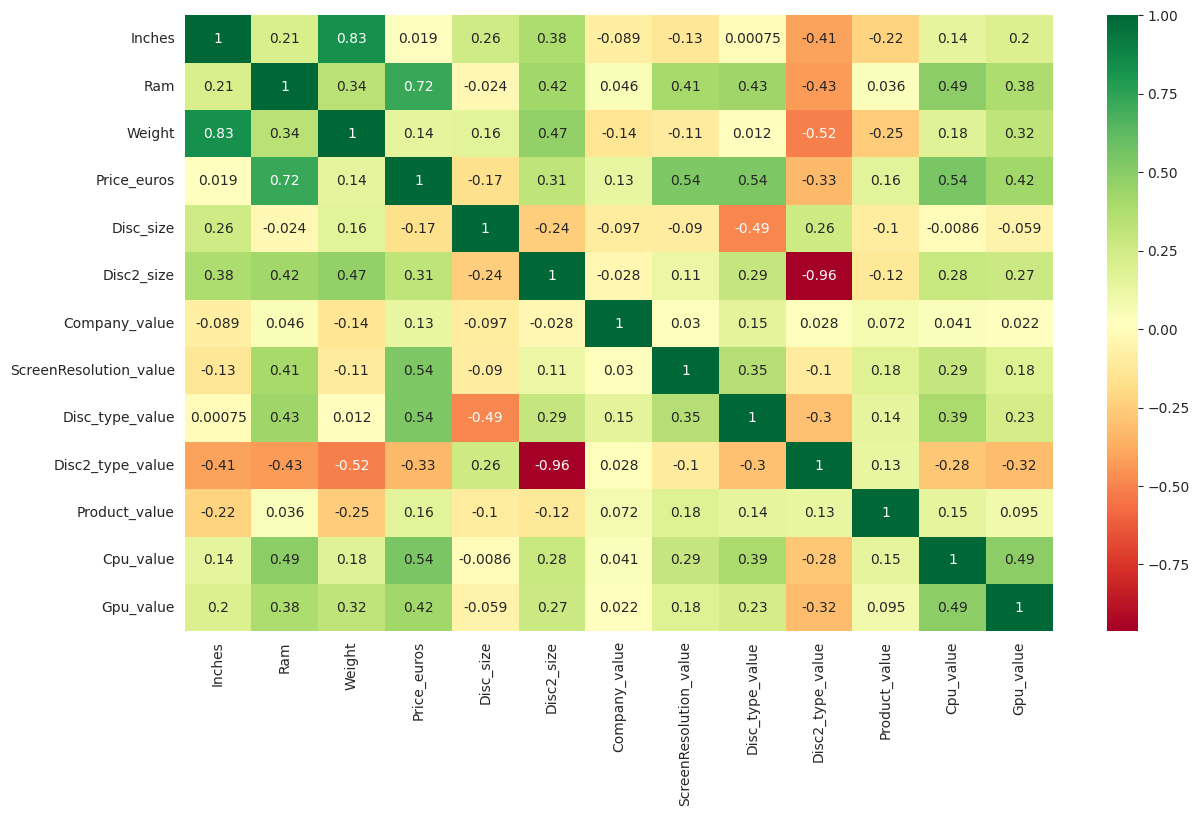

In [217]:
laptop_corr = laptop1.iloc[:,1:].corr() #nowa heat-mapa
sns.heatmap(laptop_corr, cmap='RdYlGn', annot=True)

Regresja liniowa v2

In [205]:
X=laptop1[['Inches', 'Ram', 'Weight', 'Disc_size', 'Disc2_size', 'ScreenResolution_value','Disc_type_value', 'Disc2_type_value','Company_value', 'Product_value','Cpu_value', 'Gpu_value']]

y=laptop1['Price_euros']

In [206]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=777)

In [207]:
model_lin1=LinearRegression()
model_lin1.fit(X_train, y_train)

LinearRegression()

In [208]:
y_lin_train1=model_lin1.predict(X_train)

In [209]:
y_lin_test1=model_lin1.predict(X_test)

In [210]:
r2_score(y_test, y_lin_test1) #R2 score

0.6653186980005859

In [211]:
r2_score(y_train, y_lin_train1)

0.681766843384949

In [218]:
mean_squared_error(y_test, y_lin_test1)  #MAE

131408.97124764347

In [219]:
mean_squared_error(y_train, y_lin_train1)

127433.5684304793

In [222]:
from sklearn.metrics import mean_absolute_percentage_error

In [223]:
mean_absolute_percentage_error(y_test, y_lin_test1)  #MAPE

0.28417602058157676

In [225]:
mean_absolute_percentage_error(y_train, y_lin_train1)

0.2852039758290927

Drzewo decyzyjne v2

In [212]:
dt1=DecisionTreeRegressor()
dt1.fit(X_train, y_train)

DecisionTreeRegressor()

In [213]:
y_dt_train1=dt1.predict(X_train)

In [214]:
y_dt_test1=dt1.predict(X_test)

In [215]:
r2_score(y_train, y_dt_train1) #R2 score

0.9976602909110827

In [216]:
r2_score(y_test, y_dt_test1) #model jest przetrenowany

0.7098259906960755

In [220]:
mean_squared_error(y_test, y_dt_test1)  #MAE

113933.66709652508

In [221]:
mean_squared_error(y_train, y_dt_train1)

936.9151896721576

In [231]:
mean_absolute_percentage_error(y_test, y_dt_test1)  #MAPE

0.1974610798939847

In [232]:
mean_absolute_percentage_error(y_train, y_dt_train1)

0.006331431256381633

##Podsumowanie##
Na danym zbiorze danych udało się stworzyć model predykcyjny, który przewiduje cenę laptopwa w oparciu o jego charakterystykę na poziomie 66% skuteczności.
Odpowiednim modelem do wykonania predykcji był model liniowy, ponieważ drzewo decyzyjne na obu z testowanych zbiorów wykazywało przetrenowanie modelu.